# Investigating the efect of changing $\lambda_2$

This Jupyter notebook aims to explore how the game is affected by changing the value of $\lambda_2$. Different sets of parameters are investigated to see what is the impact of $\lambda_2$ on the model

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import nashpy as nash
import numpy as np
import pandas as pd
import pathlib

import ambulance_game as abg
from main import (
    get_index_of_values,
    create_directory_with_notebook,
    looks_degenerate,
    get_path_of_experiment,
    get_parameters,
    get_matrices,
    remove_duplicate_entries,
    get_evolutionary_stable_strategies,
    get_performance_measure_for_given_strategies,
    build_performance_values_array,
    find_worst_nash_equilibrium_measure,
    get_price_of_anarchy,
    get_x_range,
    get_poa_list,
    get_poa_plot,
)

In [2]:
df = pd.read_csv(pathlib.Path("../data/_parameters/main.csv"))

# Unique values

In [3]:
col_names = [
    "mu_1", 
    "mu_2", 
    "num_of_servers_1", 
    "num_of_servers_2", 
    "system_capacity_1", 
    "system_capacity_2", 
    "buffer_capacity_1", 
    "buffer_capacity_2"
]
df[col_names].drop_duplicates()

mu_1      mu_2  num_of_servers_1  num_of_servers_2  \
0      2.000000  3.000000                 3                 2   
27500  4.202739  6.602015                 1                 3   
55000  6.773554  2.216548                 9                 9   
81389  2.000000  3.000000                 3                 2   
81400  2.000000  3.000000                 3                 2   
81411  2.000000  3.000000                 3                 2   
81422  2.000000  3.000000                 3                 2   

       system_capacity_1  system_capacity_2  buffer_capacity_1  \
0                      6                  7                  5   
27500                  2                  6                  7   
55000                 10                  9                  4   
81389                  7                  8                  5   
81400                  8                  9                  5   
81411                  9                 10                  5   
81422                 11                 12                  5   

       buffer_capacity_2  
0                      4  
27500                  4  
55000                  3  
81389                  4  
81400                  4  
81411                  4  
81422                  4

# Game 1
$$
    \lambda_{1_1} = 4.5 \hspace{1cm}
    \lambda_{1_2} = 6 \\
    \mu_1 = 2  \hspace{1cm}
    \mu_2 = 3 \\
    C_1 = 3  \hspace{1cm}
    C_2 = 2 \\
    N_1 = 6  \hspace{1cm}
    N_2 = 7 \\
    M_1 = 5  \hspace{1cm}
    M_2 = 4 \\
    \alpha = 0.9 \\
    R = 2
$$

In [4]:
problem_parameters = {
        "alpha": 0.9,
        "buffer_capacity_1": 5,
        "buffer_capacity_2": 4,
        "lambda_1_1": 4.5,
        "lambda_1_2": 6,
        "lambda_2": None,
        "mu_1": 2,
        "mu_2": 3,
        "num_of_servers_1": 3,
        "num_of_servers_2": 2,
        "system_capacity_1": 6,
        "system_capacity_2": 7,
        "target": 2,
    }

In [5]:
poa_list_lemke = None
poa_list_fictitious = None
poa_list_stochastic = None
poa_list_replicator = None

## $\lambda_2$ range

$$
    \lambda_2 \in \left( 0, 24 \right]
$$

In [6]:
lambda_2_range = get_x_range(problem_parameters)[1:]
lambda_2_range

array([ 2.75555556,  5.41111111,  8.06666667, 10.72222222, 13.37777778,
       16.03333333, 18.68888889, 21.34444444, 24.        ])

# Using Lemke-Howson 

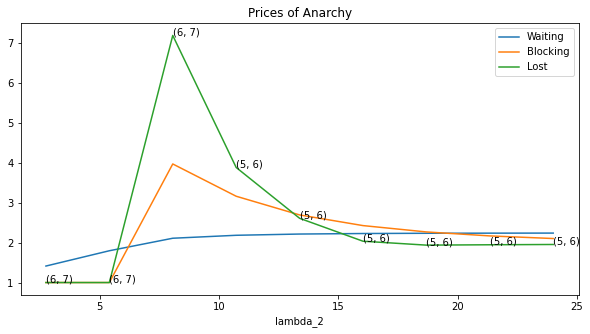

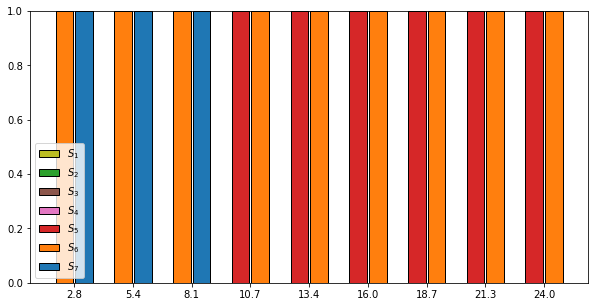

In [7]:
poa_list_lemke = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    equilib_method=nash.Game.lemke_howson_enumeration,
    annotate=True,
    show_strats=True,
    poa_list=poa_list_lemke,
)

**Waiting time PoA**: increases as $\lambda_2$ increases and sort of stabilises

**Blocking time PoA**: increases until the systems change their NE strategies and then starts decreasing

**Lost individuals PoA**: increases until the systems change their NE strategies and then starts decreasing
- This did not make sense at first

# Using fictitious play

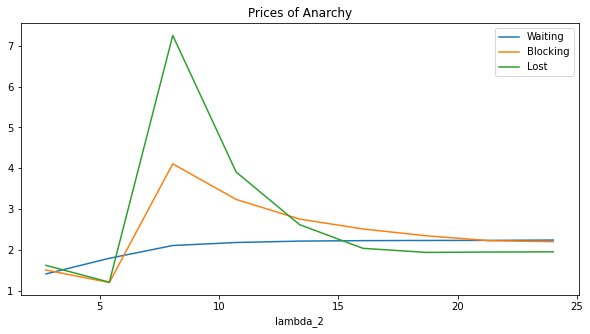

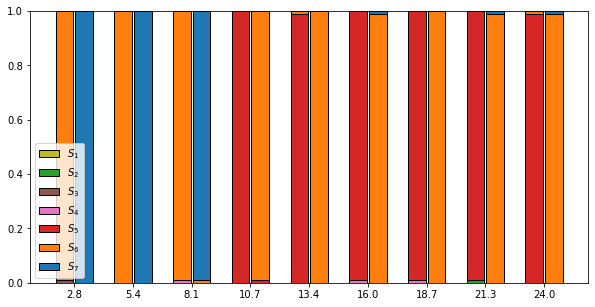

In [8]:
poa_list_fictitious = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    poa_list=poa_list_fictitious,
    equilib_method=nash.Game.fictitious_play,
    annotate=True,
    show_strats=False,
    iterations=100,
)

# Using stochastic fictitious play

Note here that both stochastic fictitious play and asymmetric replicator dynamics struggle with reaching the Nash Equilibrium. That is because of the values of $A$ and $B$ being very small and both algorithms struggle with such small values. 

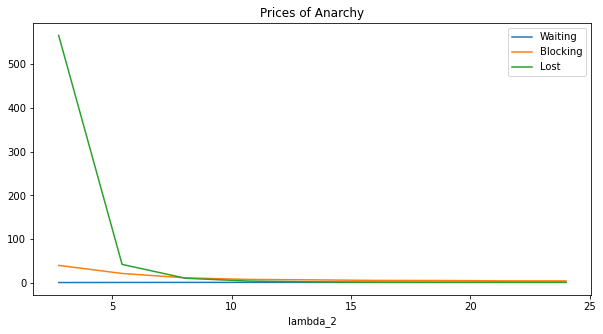

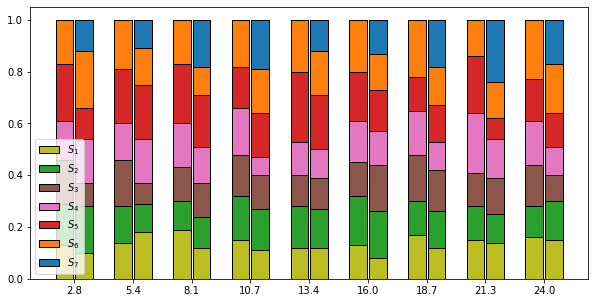

In [9]:
poa_list_stochastic = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    equilib_method=nash.Game.stochastic_fictitious_play,
    poa_list=poa_list_stochastic,
    annotate=False,
    show_strats=True,
    iterations=100,
)

## Changing iterations / etha / epsilon_bar / scaling

In [16]:
poa_list_stochastic_2 = None
poa_list_stochastic_3 = None
poa_list_stochastic_4 = None
poa_list_stochastic_5 = None

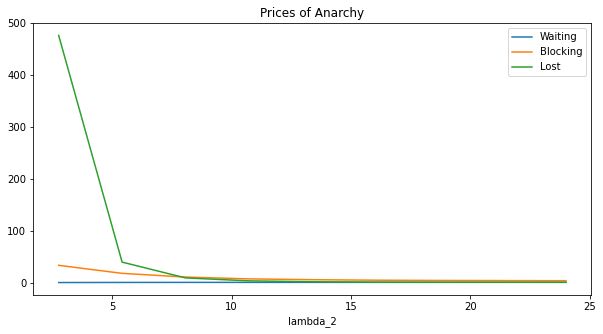

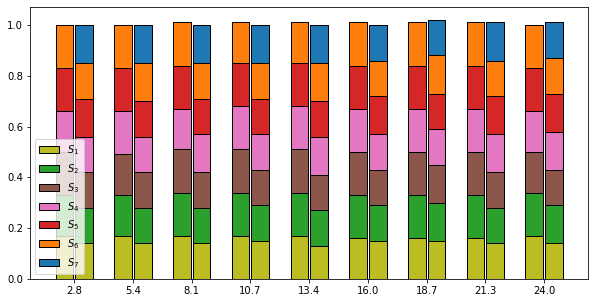

In [17]:
# Increasing iterations
poa_list_stochastic_2 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    equilib_method=nash.Game.stochastic_fictitious_play,
    poa_list=poa_list_stochastic_2,
    annotate=False,
    show_strats=True,
    iterations=10000,
)

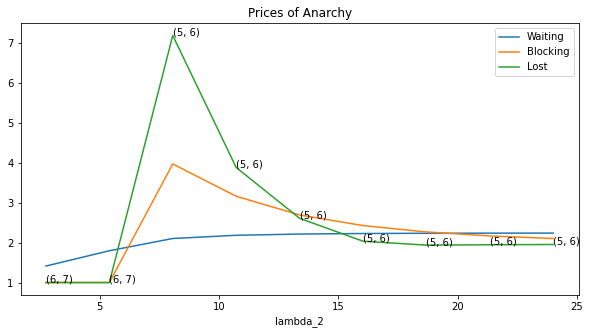

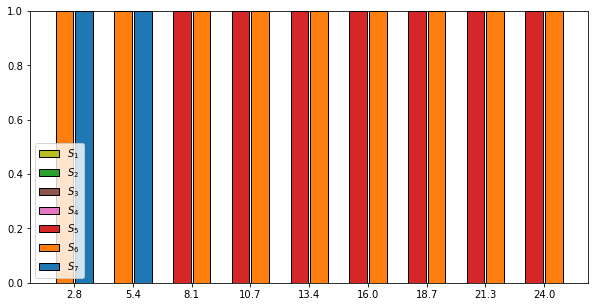

In [18]:
# Decreasing etha and epsilon bar
poa_list_stochastic_3 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    equilib_method=nash.Game.stochastic_fictitious_play,
    poa_list=poa_list_stochastic_3,
    annotate=True,
    show_strats=True,
    iterations=100,
    scalar=10,
    epsilon_bar=1e-4,
    etha=1e-5,
)

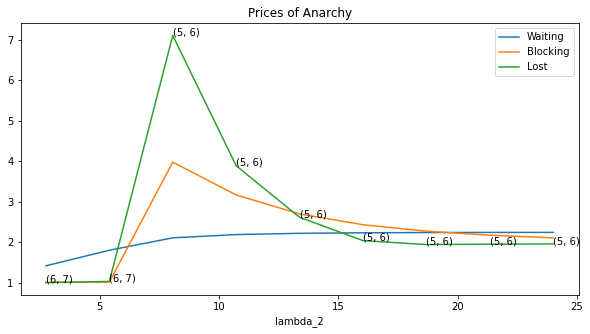

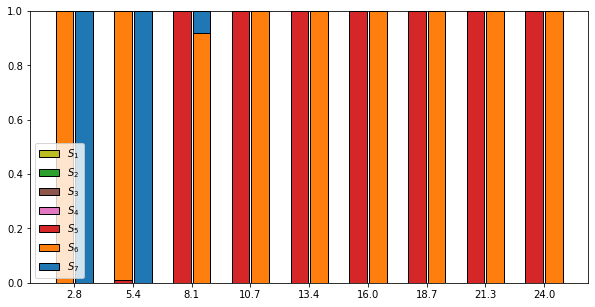

In [19]:
# Scaling A and B
poa_list_stochastic_4 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    equilib_method=nash.Game.stochastic_fictitious_play,
    poa_list=poa_list_stochastic_4,
    annotate=True,
    show_strats=True,
    iterations=100,
    scalar=20000,
)

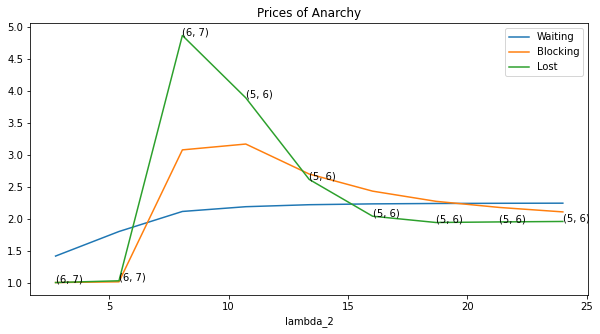

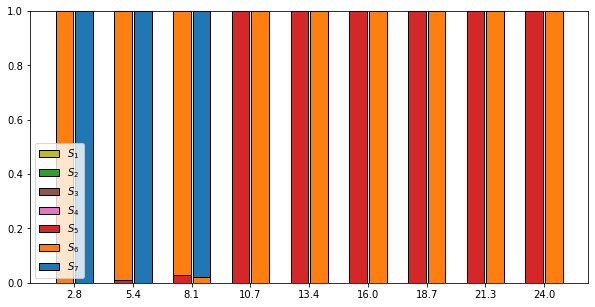

In [24]:
# Decreasing scaling of A and B
poa_list_stochastic_5 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    equilib_method=nash.Game.stochastic_fictitious_play,
    poa_list=poa_list_stochastic_5,
    annotate=True,
    show_strats=True,
    iterations=100,
    scalar=9000,
)

From the above experiments it can was observed that stochastic fictitious play converges to the same behaviour as the NE whenever some expression in terms of $\eta, \bar{\epsilon}, k$ is satisfied (where $k$ is the scalar value of the matrices). As $\eta$ and $\bar{\epsilon}$ tend to $0$ the stochasticity of SFP fades out and the algorithm tends fictitious play. Not investigated further.

# Using asymmetric replicator dynamics

In [20]:
poa_list_replicator_2 = None
poa_list_replicator_3 = None

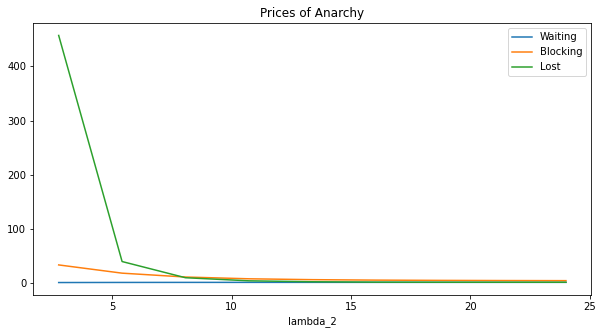

In [21]:
poa_list_replicator = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    equilib_method=nash.Game.asymmetric_replicator_dynamics,
    poa_list=poa_list_replicator,
    annotate=False,
    show_strats=True,
)

## Changing timepoints / initial values / scaling

In [22]:
# Increasing timepoints and adding initial values
poa_list_replicator_2 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    equilib_method=nash.Game.asymmetric_replicator_dynamics,
    poa_list=poa_list_replicator_2,
    annotate=True,
    show_strats=False,
    timepoints=np.linspace(1, 1000, 10),
    x0=np.array([0, 0, 0, 0, 0, 1]),
    y0=np.array([0, 0, 0, 0, 0, 0, 1]),
)

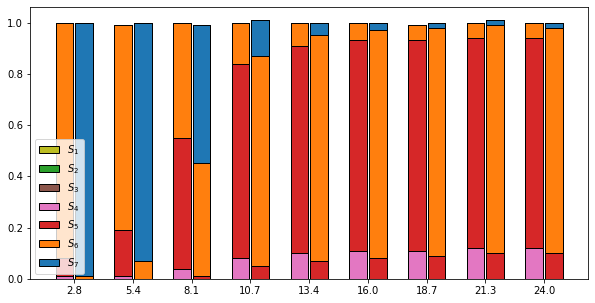

In [23]:
# Increasing timepoints and scaling
poa_list_replicator_3 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    equilib_method=nash.Game.asymmetric_replicator_dynamics,
    poa_list=poa_list_replicator_3,
    annotate=True,
    show_strats=True,
    timepoints=np.linspace(1, 1000, 10),
    scalar=20
)

# Increasing system capacity

In [36]:
poa_list_sys_1 = None
poa_list_sys_2 = None
poa_list_sys_3 = None

In [47]:
poa_list_asym_sys_1 = None
poa_list_asym_sys_2 = None
poa_list_asym_sys_3 = None

In [38]:
lambda_2_range = np.concatenate(
    (np.linspace(0.1, 16.03333333, 7), np.linspace(20, 50, 4))
)[2:]
lambda_2_range

array([ 5.41111111,  8.06666667, 10.72222222, 13.37777778, 16.03333333,
       20.        , 30.        , 40.        , 50.        ])

## $N_1 = 7, N_2 = 8$ 

In [52]:
problem_parameters = {
    "alpha": 0.9,
    "buffer_capacity_1": 5,
    "buffer_capacity_2": 4,
    "lambda_1_1": 4.5,
    "lambda_1_2": 6,
    "lambda_2": None,
    "mu_1": 2,
    "mu_2": 3,
    "num_of_servers_1": 3,
    "num_of_servers_2": 2,
    "system_capacity_1": 7,
    "system_capacity_2": 8,
    "target": 2,
}

### Lemke-Howson

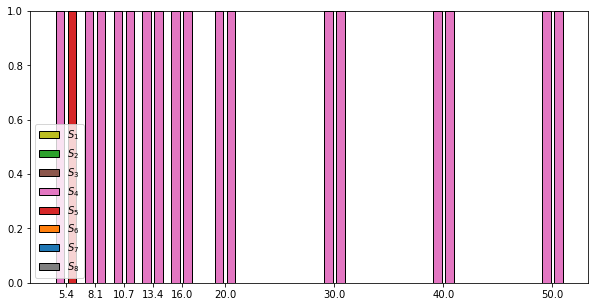

In [65]:
poa_list_sys_1 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    equilib_method=nash.Game.lemke_howson_enumeration,
    annotate=True,
    show_strats=True,
    poa_list=poa_list_sys_1,
    bar_sep=0.55,
)

### Asymmetric replicator dynamics

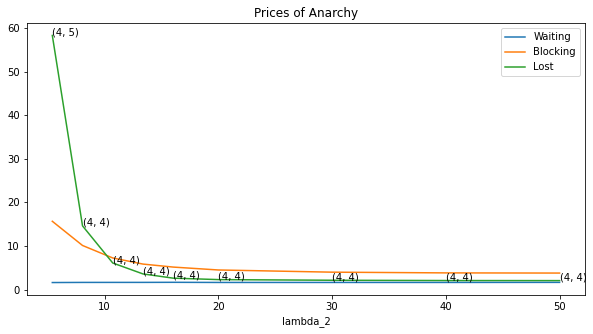

In [66]:
poa_list_asym_sys_1 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    equilib_method=nash.Game.asymmetric_replicator_dynamics,
    annotate=True,
    show_strats=True,
    poa_list=poa_list_asym_sys_1,
    timepoints=np.linspace(1, 1000, 10),
    scalar=20,
    bar_sep=0.55,
)

## $N_1 = 8, N_2 = 9$ 

In [54]:
problem_parameters = {
    "alpha": 0.9,
    "buffer_capacity_1": 5,
    "buffer_capacity_2": 4,
    "lambda_1_1": 4.5,
    "lambda_1_2": 6,
    "lambda_2": None,
    "mu_1": 2,
    "mu_2": 3,
    "num_of_servers_1": 3,
    "num_of_servers_2": 2,
    "system_capacity_1": 8,
    "system_capacity_2": 9,
    "target": 2,
}

### Lemke-Howson

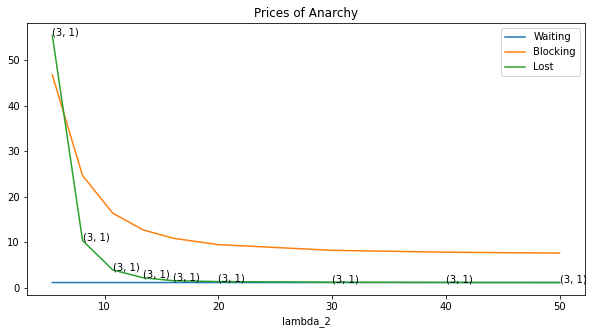

In [63]:
poa_list_sys_2 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    equilib_method=nash.Game.lemke_howson_enumeration,
    annotate=True,
    show_strats=True,
    poa_list=poa_list_sys_2,
    bar_sep=0.55,
)

### Asymmetric replicator dynamics

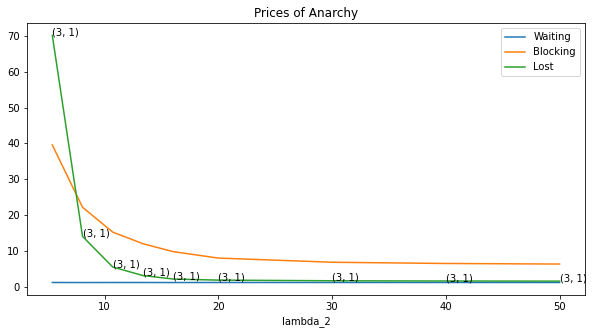

In [64]:
poa_list_asym_sys_2 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    equilib_method=nash.Game.asymmetric_replicator_dynamics,
    annotate=True,
    show_strats=True,
    poa_list=poa_list_asym_sys_2,
    timepoints=np.linspace(1, 1000, 10),
    scalar=20,
    bar_sep=0.55,
)

## $N_1 = 9, N_2 = 10$ 

In [56]:
problem_parameters = {
    "alpha": 0.9,
    "buffer_capacity_1": 5,
    "buffer_capacity_2": 4,
    "lambda_1_1": 4.5,
    "lambda_1_2": 6,
    "lambda_2": None,
    "mu_1": 2,
    "mu_2": 3,
    "num_of_servers_1": 3,
    "num_of_servers_2": 2,
    "system_capacity_1": 9,
    "system_capacity_2": 10,
    "target": 2,
}

### Lemke-Howson

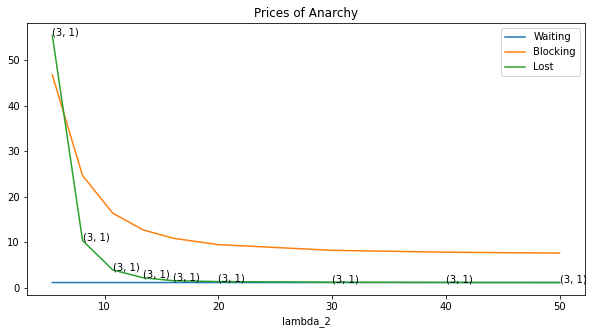

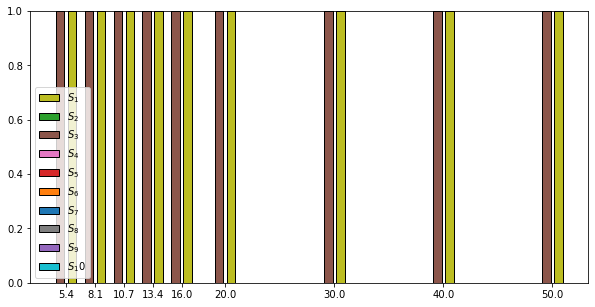

In [67]:
poa_list_sys_3 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    equilib_method=nash.Game.lemke_howson_enumeration,
    annotate=True,
    show_strats=True,
    poa_list=poa_list_sys_3,
    bar_sep=0.55,
)

### Asymmetric replicator dynamics

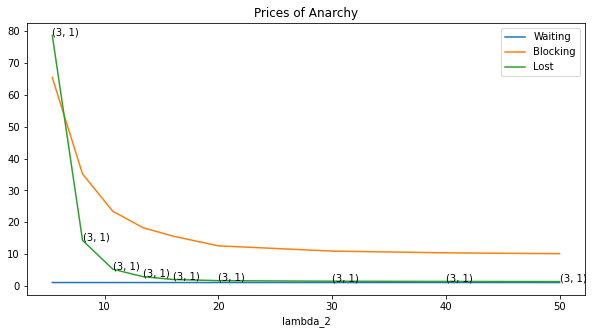

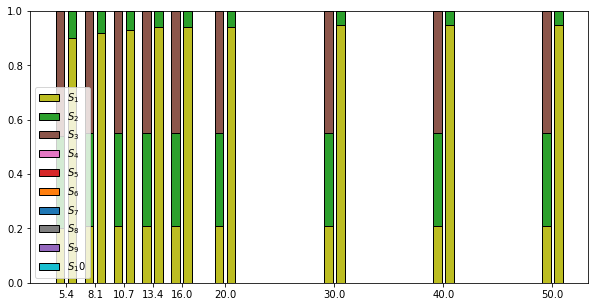

In [68]:
poa_list_asym_sys_3 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    equilib_method=nash.Game.asymmetric_replicator_dynamics,
    annotate=True,
    show_strats=True,
    poa_list=poa_list_asym_sys_3,
    timepoints=np.linspace(1, 1000, 10),
    scalar=20,
    bar_sep=0.55
)

In [217]:
lambda_2_range

array([ 5.41111111,  8.06666667, 10.72222222, 13.37777778, 16.03333333,
       20.        , 30.        , 40.        , 50.        ])

# Learning algorithms starting at minimum performance measure

## $\lambda_2 = 5.4$

In [233]:
problem_parameters = {
        "alpha": 0.9,
        "buffer_capacity_1": 5,
        "buffer_capacity_2": 4,
        "lambda_1_1": 4.5,
        "lambda_1_2": 6,
        "lambda_2": 5.4,
        "mu_1": 2,
        "mu_2": 3,
        "num_of_servers_1": 3,
        "num_of_servers_2": 2,
        "system_capacity_1": 6,
        "system_capacity_2": 7,
        "target": 2,
    }

In [226]:
x_init = np.array([0.99, 0.002, 0.002, 0.002, 0.002, 0.002])
y_init = np.array([0.99, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001])
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R, A, B = get_matrices(dirname)
game = nash.Game(A * 20, B * 20)
xs, ys = game.asymmetric_replicator_dynamics(timepoints=np.linspace(1, 1000, 10), x0=x_init, y0=y_init)

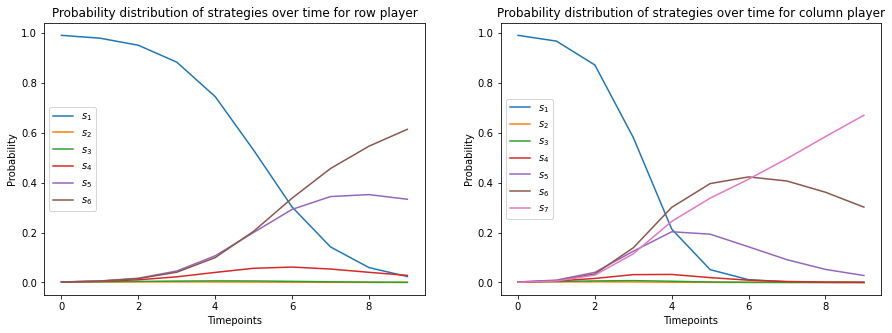

In [220]:
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(xs) 
plt.xlabel("Timepoints") 
plt.ylabel("Probability") 
plt.title("Probability distribution of strategies over time for row player") 
plt.legend([f"$s_{i + 1}$" for i in range(len(xs[0]))]) 
plt.subplot(1, 2, 2) 
plt.plot(ys) 
plt.xlabel("Timepoints") 
plt.ylabel("Probability") 
plt.title("Probability distribution of strategies over time for column player") 
plt.legend([f"$s_{i + 1}$" for i in range(len(ys[0]))]) 

**Minimum at:** (1, 1)

**Equilibrium at:** (6, 7)

## $\lambda_2 = 8.06$

In [229]:
problem_parameters["lambda_2"] = 8.06

In [230]:
x_init = np.array([0.99, 0.002, 0.002, 0.002, 0.002, 0.002])
y_init = np.array([0.99, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001])
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R, A, B = get_matrices(dirname)
game = nash.Game(A * 20, B * 20)
xs, ys = game.asymmetric_replicator_dynamics(timepoints=np.linspace(1, 1000, 10), x0=x_init, y0=y_init)

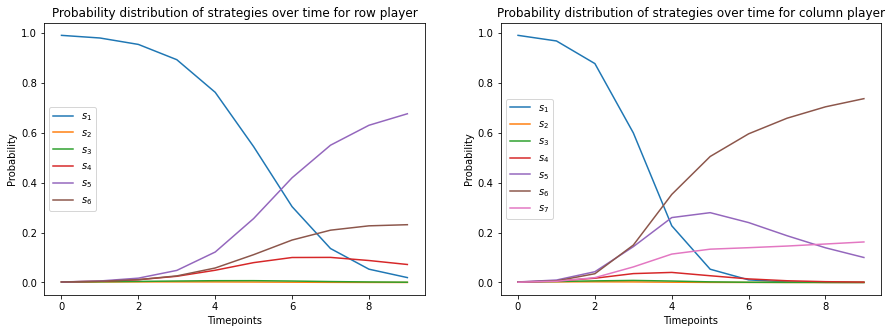

In [216]:
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(xs) 
plt.xlabel("Timepoints") 
plt.ylabel("Probability") 
plt.title("Probability distribution of strategies over time for row player") 
plt.legend([f"$s_{i + 1}$" for i in range(len(xs[0]))]) 
plt.subplot(1, 2, 2) 
plt.plot(ys) 
plt.xlabel("Timepoints") 
plt.ylabel("Probability") 
plt.title("Probability distribution of strategies over time for column player") 
plt.legend([f"$s_{i + 1}$" for i in range(len(ys[0]))]) 

**Minimum at:** (1, 1)

**Equilibrium at:** (5, 6)

## $\lambda_2 = 10.7$

In [221]:
problem_parameters["lambda_2"] = 10.7

In [222]:
x_init = np.array([0.99, 0.002, 0.002, 0.002, 0.002, 0.002])
y_init = np.array([0.99, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001])
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R, A, B = get_matrices(dirname)
game = nash.Game(A * 20, B * 20)
xs, ys = game.asymmetric_replicator_dynamics(timepoints=np.linspace(1, 1000, 10), x0=x_init, y0=y_init)

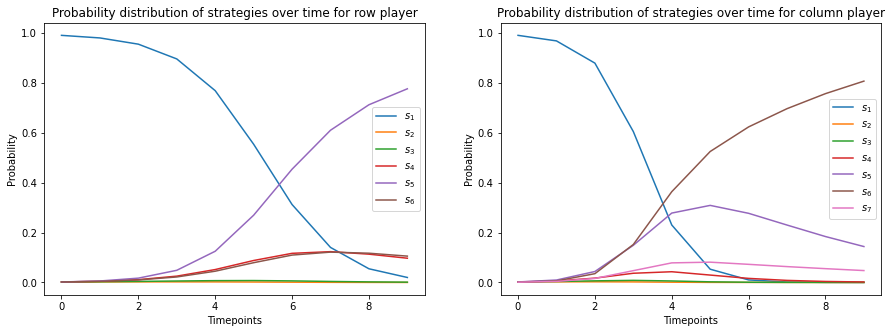

In [223]:
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(xs) 
plt.xlabel("Timepoints") 
plt.ylabel("Probability") 
plt.title("Probability distribution of strategies over time for row player") 
plt.legend([f"$s_{i + 1}$" for i in range(len(xs[0]))]) 
plt.subplot(1, 2, 2) 
plt.plot(ys) 
plt.xlabel("Timepoints") 
plt.ylabel("Probability") 
plt.title("Probability distribution of strategies over time for column player") 
plt.legend([f"$s_{i + 1}$" for i in range(len(ys[0]))]) 

**Minimum at:** (1, 1)

**Equilibrium at:** (5, 6)

## The values of the graph

In [7]:
np.asarray(poa_list)

array([[1.41370046, 1.        , 1.        ],
       [1.79718097, 1.        , 1.        ],
       [2.10459001, 3.97377865, 7.19686622],
       [2.18507718, 3.16431651, 3.88616666],
       [2.21621461, 2.69583909, 2.61170101],
       [2.22933545, 2.42823289, 2.03637521],
       [2.23541285, 2.26913068, 1.9381185 ],
       [2.23847457, 2.16949376, 1.94735683],
       [2.2401288 , 2.10385495, 1.95442504]])

## Minimum and NE mean waiting times indices

In [9]:
for lambda_value in lambda_2_range:
    problem_parameters["lambda_2"] = lambda_value
    index = get_index_of_values(problem_parameters=problem_parameters, data=df, atol=1e-1)[0]
    target_dir = df.iloc[index]["hash_value"]
    R, A, B = get_matrices(target_dir)
    strat_A, strat_B = get_lemke_howson_outcome(target_dir)[0]
    waiting_poa_array = build_performance_values_array(
        routing=R,
        parameters=problem_parameters, 
        performance_measure_function=abg.markov.get_mean_waiting_time_using_markov_state_probabilities,
    )
    min_cord_A = np.where(waiting_poa_array == waiting_poa_array.min())[0][0]
    min_cord_B = np.where(waiting_poa_array == waiting_poa_array.min())[1][0]
    eq_cord_A = np.argmax(strat_A)
    eq_cord_B = np.argmax(strat_B)
    min_cords = (min_cord_A + 1, min_cord_B + 1)
    eq_cords = (eq_cord_A + 1, eq_cord_B + 1)
    print("lambda_2: ", lambda_value, " -> Minimum at ", min_cords, " and equilibrium at ", eq_cords)

lambda_2:  2.7555555555555555  -> Minimum at  (1, 1)  and equilibrium at  (6, 7)
lambda_2:  5.4111111111111105  -> Minimum at  (1, 1)  and equilibrium at  (6, 7)
lambda_2:  8.066666666666666  -> Minimum at  (1, 1)  and equilibrium at  (5, 6)
lambda_2:  10.722222222222221  -> Minimum at  (1, 1)  and equilibrium at  (5, 6)
lambda_2:  13.377777777777776  -> Minimum at  (1, 1)  and equilibrium at  (5, 6)
lambda_2:  16.033333333333335  -> Minimum at  (1, 1)  and equilibrium at  (5, 6)
lambda_2:  18.68888888888889  -> Minimum at  (1, 1)  and equilibrium at  (5, 6)
lambda_2:  21.344444444444445  -> Minimum at  (1, 1)  and equilibrium at  (5, 6)
lambda_2:  24.0  -> Minimum at  (1, 1)  and equilibrium at  (5, 6)


The above code looks into the thresholds of the two players that get the minimum waiting time and the strategies that get the NE. The minimum mean waiting time always occurs at $T_1=1, T_2=1$ and the equilibrium starts from $T_1=6, T_2=7$ and goes to $T_1=5, T_2=6$ as $\lambda_2$ increases. The PoA of the mean waiting time is always increasing in the plot.  

## Example of mean waiting time array ($\lambda_2=24$) 

In [10]:
np.asarray(waiting_poa_array)

array([[0.51487797, 0.54691884, 0.63022994, 0.71355582, 0.79688426,
        0.88020861, 0.96343297],
       [0.52908098, 0.56091186, 0.64425093, 0.72763124, 0.81090885,
        0.89403801, 0.97652378],
       [0.57604007, 0.60584955, 0.68821364, 0.77322324, 0.85745851,
        0.94072581, 1.02197405],
       [0.68640559, 0.71532525, 0.79666386, 0.88221538, 0.96727089,
        1.05070837, 1.13009111],
       [0.78936225, 0.81672833, 0.89582219, 0.9817818 , 1.06859174,
        1.15339298, 1.23394265],
       [0.88457493, 0.90829624, 0.98077556, 1.06519646, 1.15512113,
        1.24439965, 1.32734955]])

## Minimum and NE mean blocking times indices

In [16]:
for lambda_value in lambda_2_range:
    problem_parameters["lambda_2"] = lambda_value
    index = get_index_of_values(problem_parameters=problem_parameters, data=df, atol=1e-1)[0]
    target_dir = df.iloc[index]["hash_value"]
    R, A, B = get_matrices(target_dir)
    strat_A, strat_B = get_lemke_howson_outcome(target_dir)[0]
    blocking_poa_array = build_performance_values_array(
        routing=R,
        parameters=problem_parameters, 
        performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
    )
    min_cord_A = np.where(blocking_poa_array == blocking_poa_array.min())[0][0]
    min_cord_B = np.where(blocking_poa_array == blocking_poa_array.min())[1][0]
    eq_cord_A = np.argmax(strat_A)
    eq_cord_B = np.argmax(strat_B)
    min_cords = (min_cord_A + 1, min_cord_B + 1)
    eq_cords = (eq_cord_A + 1, eq_cord_B + 1)
    print("lambda_2: ", lambda_value, " -> Minimum at ", min_cords, " and equilibrium at ", eq_cords)

lambda_2:  2.7555555555555555  -> Minimum at  (6, 7)  and equilibrium at  (6, 7)
lambda_2:  5.4111111111111105  -> Minimum at  (6, 7)  and equilibrium at  (6, 7)
lambda_2:  8.066666666666666  -> Minimum at  (6, 7)  and equilibrium at  (5, 6)
lambda_2:  10.722222222222221  -> Minimum at  (6, 7)  and equilibrium at  (5, 6)
lambda_2:  13.377777777777776  -> Minimum at  (6, 7)  and equilibrium at  (5, 6)
lambda_2:  16.033333333333335  -> Minimum at  (6, 7)  and equilibrium at  (5, 6)
lambda_2:  18.68888888888889  -> Minimum at  (6, 7)  and equilibrium at  (5, 6)
lambda_2:  21.344444444444445  -> Minimum at  (6, 7)  and equilibrium at  (5, 6)
lambda_2:  24.0  -> Minimum at  (6, 7)  and equilibrium at  (5, 6)


## Minimum and NE mean proportion of class 2 individuals lost indices

In [29]:
for lambda_value in lambda_2_range:
    problem_parameters["lambda_2"] = lambda_value
    index = get_index_of_values(problem_parameters=problem_parameters, data=df, atol=1e-1)[0]
    target_dir = df.iloc[index]["hash_value"]
    R, A, B = get_matrices(target_dir)
    strat_A, strat_B = get_lemke_howson_outcome(target_dir)[0]
    lost_poa_array = build_performance_values_array(
        routing=R,
        parameters=problem_parameters, 
        performance_measure_function=abg.markov.get_accepting_proportion_of_class_2_individuals,
    )
    min_cord_A = np.where(lost_poa_array == lost_poa_array.min())[0][0]
    min_cord_B = np.where(lost_poa_array == lost_poa_array.min())[1][0]
    eq_cord_A = np.argmax(strat_A)
    eq_cord_B = np.argmax(strat_B)
    min_cords = (min_cord_A + 1, min_cord_B + 1)
    eq_cords = (eq_cord_A + 1, eq_cord_B + 1)
    eq_value = lost_poa_array[eq_cord_A, eq_cord_B]
    print("lambda_2: ", lambda_value, " -> Minimum is ", np.min(lost_poa_array) / 2, " at ", min_cords, " and equilibrium is ", eq_value, " at ", eq_cords)

lambda_2:  2.7555555555555555  -> Minimum is  0.0002529106655554947  at  (6, 7)  and equilibrium is  0.0005058213311109894  at  (6, 7)
lambda_2:  5.4111111111111105  -> Minimum is  0.006790416320029136  at  (6, 7)  and equilibrium is  0.013580832640058271  at  (6, 7)
lambda_2:  8.066666666666666  -> Minimum is  0.039132979004973256  at  (6, 7)  and equilibrium is  0.5632696292003981  at  (5, 6)
lambda_2:  10.722222222222221  -> Minimum is  0.10933771433261807  at  (6, 7)  and equilibrium is  0.8498091596591306  at  (5, 6)
lambda_2:  13.377777777777776  -> Minimum is  0.20242280399822954  at  (6, 7)  and equilibrium is  1.0573356850409041  at  (5, 6)
lambda_2:  16.033333333333335  -> Minimum is  0.29618968628033904  at  (6, 7)  and equilibrium is  1.206306668474868  at  (5, 6)
lambda_2:  18.68888888888889  -> Minimum is  0.3395747266300151  at  (6, 1)  and equilibrium is  1.3162721173752194  at  (5, 6)
lambda_2:  21.344444444444445  -> Minimum is  0.35948860413392736  at  (6, 1)  and eq

## Example of mean proportion of class 2 individuals lost array ($\lambda_2=24$) 

In [23]:
lost_poa_array / 2

array([[0.90844469, 0.69238811, 0.66283654, 0.6306226 , 0.59262745,
        0.53927311, 0.42751763],
       [0.70717469, 0.90242254, 0.8910815 , 0.85843798, 0.81117253,
        0.74146951, 0.59218654],
       [0.61184789, 0.81200086, 0.83400535, 0.84157775, 0.82495244,
        0.76889955, 0.61980489],
       [0.58364956, 0.77909368, 0.80392227, 0.81598621, 0.80855241,
        0.76173698, 0.61595818],
       [0.53674688, 0.72217434, 0.74996428, 0.76543959, 0.76609605,
        0.7329453 , 0.59680199],
       [0.37501837, 0.58693435, 0.61796449, 0.63542625, 0.64006488,
        0.61937051, 0.50548899]])

# Game 2 (decreasing $\lambda_{1_1}$ and $\lambda_{1_2}$)
$$
    \lambda_{1_1} = 1.5 \hspace{1cm}
    \lambda_{1_2} = 1.5 \\
    \mu_1 = 2  \hspace{1cm}
    \mu_2 = 3 \\
    C_1 = 3  \hspace{1cm}
    C_2 = 2 \\
    N_1 = 6  \hspace{1cm}
    N_2 = 7 \\
    M_1 = 5  \hspace{1cm}
    M_2 = 4 \\
    \alpha = 0.9 \\
    R = 2
$$

In [24]:
problem_parameters = {
        "alpha": 0.9,
        "buffer_capacity_1": 5,
        "buffer_capacity_2": 4,
        "lambda_1_1": 1.5,
        "lambda_1_2": 1.5,
        "lambda_2": None,
        "mu_1": 2,
        "mu_2": 3,
        "num_of_servers_1": 3,
        "num_of_servers_2": 2,
        "system_capacity_1": 6,
        "system_capacity_2": 7,
        "target": 2,
    }

## $\lambda_2$ range

In [25]:
lambda_2_range = get_x_range(problem_parameters)[1:]
lambda_2_range

array([ 2.75555556,  5.41111111,  8.06666667, 10.72222222, 13.37777778,
       16.03333333, 18.68888889, 21.34444444, 24.        ])

## Prices of anarchy

In [26]:
poa_list_2 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters,
    x_range=lambda_2_range, 
    key_name="lambda_2",
)

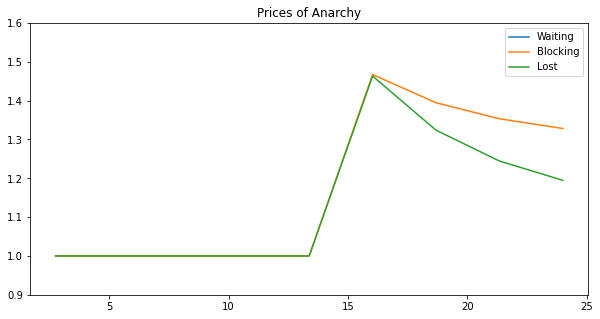

In [14]:
poa_list_2 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    poa_list=poa_list_2, 
    x_range=lambda_2_range, 
    key_name="lambda_2",
    y_min=0.9, 
    y_max=1.6
)

In [15]:
poa_list_2

[[4.925577122237658, 1.0, 1.0],
 [11.890384851945582, 1.0, 1.0],
 [21.645984100693756, 1.0, 1.0],
 [30.993319392165947, 1.0, 1.0],
 [36.980352575629816, 1.0, 1.0],
 [32.65546839186717, 1.4672472146826419, 1.4633166602372414],
 [33.30956883690479, 1.3946026052787874, 1.3239808937880433],
 [33.60761051085413, 1.3534226916106455, 1.244562738058463],
 [33.75248335517575, 1.3282955804176897, 1.194788996742723]]

## Minimum and NE mean blocking times indices

In [27]:
for lambda_value in lambda_2_range:
    problem_parameters["lambda_2"] = lambda_value
    index = get_index_of_values(problem_parameters=problem_parameters, data=df, atol=1e-1)[0]
    target_dir = df.iloc[index]["hash_value"]
    R, A, B = get_matrices(target_dir)
    strat_A, strat_B = get_lemke_howson_outcome(target_dir)[0]
    blocking_poa_array = build_performance_values_array(
        routing=R,
        parameters=problem_parameters, 
        performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
    )
    min_cord_A = np.where(blocking_poa_array == blocking_poa_array.min())[0][0]
    min_cord_B = np.where(blocking_poa_array == blocking_poa_array.min())[1][0]
    eq_cord_A = np.argmax(strat_A)
    eq_cord_B = np.argmax(strat_B)
    min_cords = (min_cord_A + 1, min_cord_B + 1)
    eq_cords = (eq_cord_A + 1, eq_cord_B + 1)
    print("lambda_2: ", lambda_value, " -> Minimum at ", min_cords, " and equilibrium at ", eq_cords)

lambda_2:  2.7555555555555555  -> Minimum at  (6, 7)  and equilibrium at  (6, 7)
lambda_2:  5.4111111111111105  -> Minimum at  (6, 7)  and equilibrium at  (6, 7)
lambda_2:  8.066666666666666  -> Minimum at  (6, 7)  and equilibrium at  (6, 7)
lambda_2:  10.722222222222221  -> Minimum at  (6, 7)  and equilibrium at  (6, 7)
lambda_2:  13.377777777777776  -> Minimum at  (6, 7)  and equilibrium at  (6, 7)
lambda_2:  16.033333333333335  -> Minimum at  (6, 7)  and equilibrium at  (5, 6)
lambda_2:  18.68888888888889  -> Minimum at  (6, 7)  and equilibrium at  (5, 6)
lambda_2:  21.344444444444445  -> Minimum at  (6, 7)  and equilibrium at  (5, 6)
lambda_2:  24.0  -> Minimum at  (6, 7)  and equilibrium at  (5, 6)


## Game 1 and Game 2 PoA overview:

As $\lambda_2$ increases the price of anarchy for the mean:
- $\textbf{Waiting time}$: increases
- $\textbf{Blocking time}$: increases until a sudden spike drops it down (where the NE changes)
- $\textbf{Proportion of lost class 2 individuals}$: increases until a sudden spike drops it down (where the NE changes)

The sudden spike in the blocking time and prop of lost inds, I believe indicates that:
- As class 2 individuals flood the system, the system's first response is to attempt to manage all individuals
- BUT as it gets out of hand the system just can't handle them so most of them are just geting lost
- LARGER systems need to be explored

# Game 3

In [37]:
problem_parameters = {
        "alpha": 0.9,
        "buffer_capacity_1": 7,
        "buffer_capacity_2": 4,
        "lambda_1_1": 3.1,
        "lambda_1_2": 5,
        "lambda_2": None,
        "mu_1": 4.2,
        "mu_2": 6.6,
        "num_of_servers_1": 1,
        "num_of_servers_2": 3,
        "system_capacity_1": 2,
        "system_capacity_2": 6,
        "target": 2,
    }

In [38]:
lambda_2_range = get_x_range(problem_parameters)[2:-1]
lambda_2_range

array([10.74444444, 16.06666667, 21.38888889, 26.71111111, 32.03333333,
       37.35555556, 42.67777778])

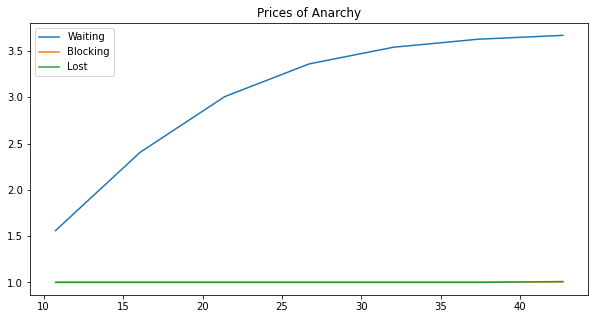

In [49]:
poa_list_3 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters,
    x_range=lambda_2_range, 
    key_name="lambda_2",
)

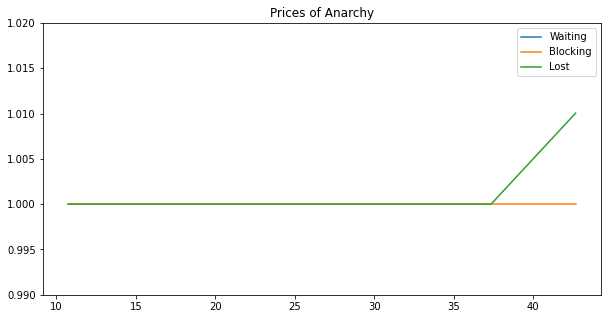

In [56]:
poa_list_3 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters,
    x_range=lambda_2_range, 
    poa_list=poa_list_3,
    key_name="lambda_2",
    y_min=0.99,
    y_max=1.02
)

## Minimum and NE mean blocking times indices

In [48]:
for lambda_value in lambda_2_range:
    problem_parameters["lambda_2"] = lambda_value
    index = get_index_of_values(problem_parameters=problem_parameters, data=df, atol=1e-1)[0]
    target_dir = df.iloc[index]["hash_value"]
    R, A, B = get_matrices(target_dir)
    strat_A, strat_B = get_lemke_howson_outcome(target_dir)[0]
    lost_poa_array = build_performance_values_array(
        routing=R,
        parameters=problem_parameters, 
        performance_measure_function=abg.markov.get_accepting_proportion_of_class_2_individuals,
    )
    min_cord_A = np.where(lost_poa_array == lost_poa_array.min())[0][0]
    min_cord_B = np.where(lost_poa_array == lost_poa_array.min())[1][0]
    eq_cord_A = np.argmax(strat_A)
    eq_cord_B = np.argmax(strat_B)
    min_cords = (min_cord_A + 1, min_cord_B + 1)
    eq_cords = (eq_cord_A + 1, eq_cord_B + 1)
    print("lambda_2: ", lambda_value, " -> Minimum at ", min_cords, " and equilibrium at ", eq_cords)

lambda_2:  10.744444444444442  -> Minimum at  (2, 6)  and equilibrium at  (2, 6)
lambda_2:  16.066666666666663  -> Minimum at  (2, 6)  and equilibrium at  (2, 6)
lambda_2:  21.388888888888886  -> Minimum at  (2, 6)  and equilibrium at  (2, 6)
lambda_2:  26.71111111111111  -> Minimum at  (2, 6)  and equilibrium at  (2, 6)
lambda_2:  32.033333333333324  -> Minimum at  (2, 6)  and equilibrium at  (2, 6)
lambda_2:  37.35555555555555  -> Minimum at  (2, 6)  and equilibrium at  (2, 6)
lambda_2:  42.67777777777777  -> Minimum at  (1, 6)  and equilibrium at  (2, 6)


In [49]:
lost_poa_array

array([[1.54801111, 1.24161605, 1.00706409, 0.99653054, 0.96128915,
        0.78853833],
       [1.58053186, 1.27365213, 1.02996142, 1.01788509, 0.98050697,
        0.80042605]])

# Changing the target

# Game 1

In [13]:
problem_parameters = {
        "alpha": 0.9,
        "buffer_capacity_1": 5,
        "buffer_capacity_2": 4,
        "lambda_1_1": 4.5,
        "lambda_1_2": 6,
        "lambda_2": 8,
        "mu_1": 2,
        "mu_2": 3,
        "num_of_servers_1": 3,
        "num_of_servers_2": 2,
        "system_capacity_1": 6,
        "system_capacity_2": 7,
        "target": None,
    }
target_range = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

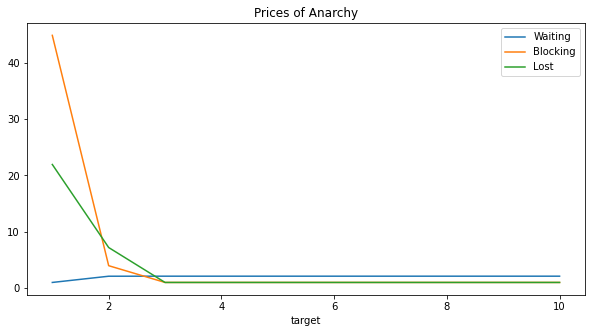

In [21]:
poa_list_tar_1 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters,
    x_range=target_range, 
    key_name="target",
)

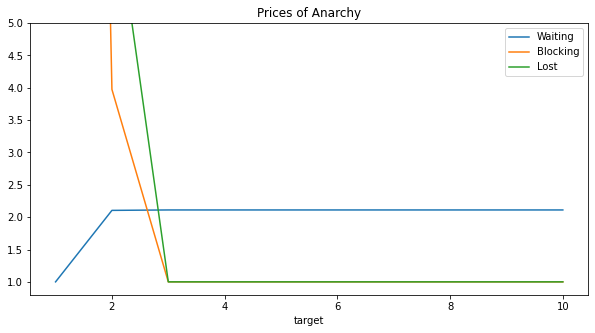

In [19]:
poa_list_tar_1 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters,
    x_range=target_range, 
    key_name="target",
    poa_list=poa_list_tar_1,
    y_max=5,
    y_min=0.8
)

# Game 2

In [64]:
problem_parameters = {
        "alpha": 0.9,
        "buffer_capacity_1": 5,
        "buffer_capacity_2": 4,
        "lambda_1_1": 6,
        "lambda_1_2": 6,
        "lambda_2": 24,
        "mu_1": 2,
        "mu_2": 3,
        "num_of_servers_1": 3,
        "num_of_servers_2": 2,
        "system_capacity_1": 6,
        "system_capacity_2": 7,
        "target": None,
    }
target_range = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

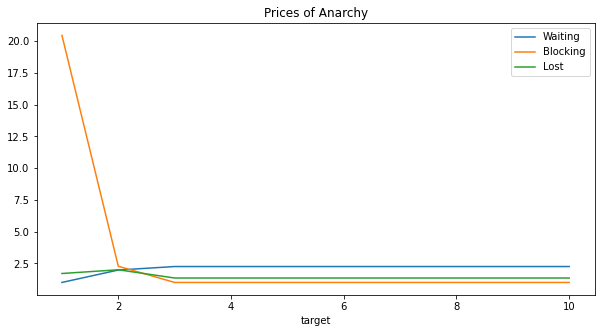

In [65]:
poa_list_tar_2 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters,
    x_range=target_range, 
    key_name="target",
)

# Changing $\lambda_2$ and the target

In [114]:
problem_parameters = {
        "alpha": 0.95,
        "buffer_capacity_1": 5,
        "buffer_capacity_2": 4,
        "lambda_1_1": 6,
        "lambda_1_2": 6,
        "lambda_2": None,
        "mu_1": 2,
        "mu_2": 3,
        "num_of_servers_1": 3,
        "num_of_servers_2": 2,
        "system_capacity_1": 6,
        "system_capacity_2": 7,
        "target": 1,
    }

In [117]:
lambda_2_range = get_x_range(problem_parameters)[2:]
lambda_2_range

array([ 0.1       ,  2.75555556,  5.41111111,  8.06666667, 10.72222222,
       13.37777778, 16.03333333, 18.68888889, 21.34444444, 24.        ])

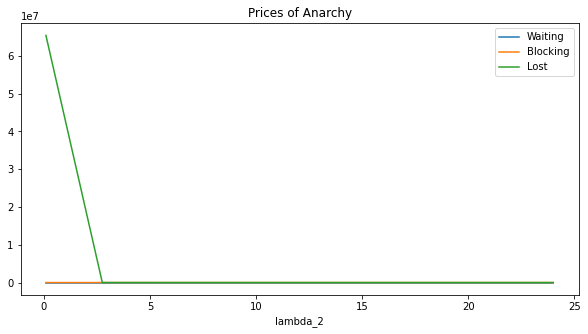

In [118]:
poa_list_tar_1 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range, 
    key_name="lambda_2"
)

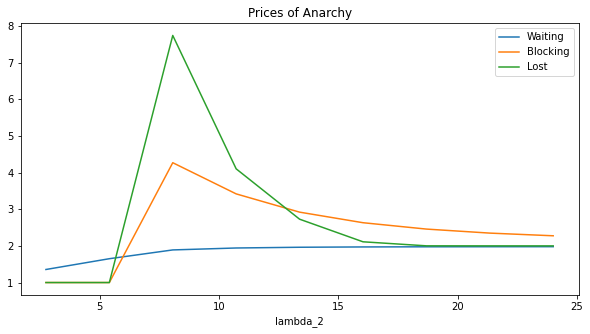

In [121]:
problem_parameters["target"] = 2
poa_list_tar_2 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range[1:], 
    key_name="lambda_2"
)

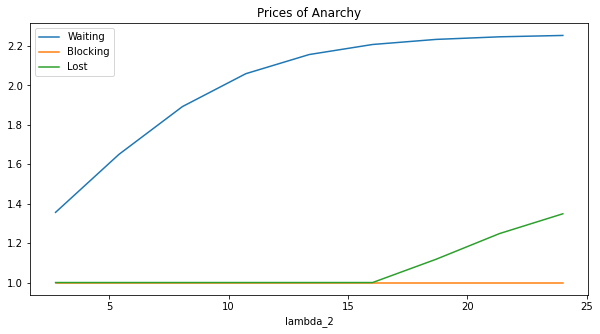

In [122]:
problem_parameters["target"] = 3
poa_list_tar_3 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range[1:], 
    key_name="lambda_2"
)

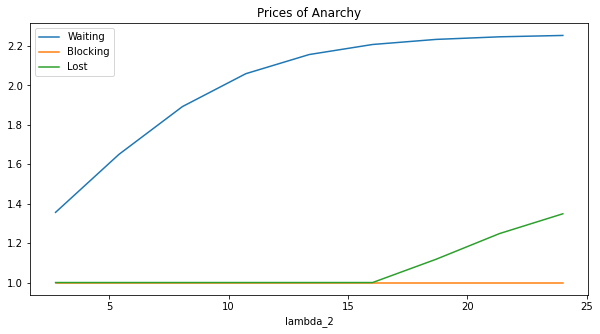

In [123]:
problem_parameters["target"] = 4
poa_list_tar_4 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range[1:], 
    key_name="lambda_2"
)

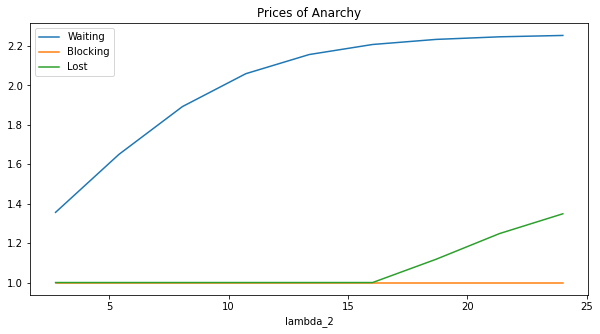

In [124]:
problem_parameters["target"] = 5
poa_list_tar_5 = get_poa_plot(
    data=df,
    problem_parameters=problem_parameters, 
    x_range=lambda_2_range[1:], 
    key_name="lambda_2"
)

# Finding valid cases

In [61]:
problem_parameters = {
        "alpha": 0.9,
        "buffer_capacity_1": 5,
        "buffer_capacity_2": 4,
        "lambda_1_1": 6,
        "lambda_1_2": 6,
        "lambda_2": 24,
        "mu_1": 2,
        "mu_2": 3,
        "num_of_servers_1": 3,
        "num_of_servers_2": 2,
        "system_capacity_1": 6,
        "system_capacity_2": 7,
        "target": None,
    }
target_range = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [63]:
for lamb in target_range:
    problem_parameters["target"] = lamb
    index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
    print(index)

Int64Index([27424], dtype='int64')
Int64Index([27425], dtype='int64')
Int64Index([27426], dtype='int64')
Int64Index([27427], dtype='int64')
Int64Index([27428], dtype='int64')
Int64Index([27429], dtype='int64')
Int64Index([27430], dtype='int64')
Int64Index([27431], dtype='int64')
Int64Index([27432], dtype='int64')
Int64Index([27433], dtype='int64')


In [109]:
problem_parameters["lambda_2"] = 16.06
df.iloc[get_index_of_values(problem_parameters=problem_parameters, data=df, atol=1e-1)]["hash_value"]

19186    f5059f906501dfe21ec62ff5b2a6c761
Name: hash_value, dtype: object

In [110]:
lambda_2_range = get_x_range(problem_parameters)
lambda_2_range

array([ 0.1       ,  2.75555556,  5.41111111,  8.06666667, 10.72222222,
       13.37777778, 16.03333333, 18.68888889, 21.34444444, 24.        ])